In [1]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import savemat
import os
import fnmatch
from time import sleep

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN

%matplotlib inline

In [2]:
def parse_horizon(infile):
    ils, xls, values = ([],[],[])
    with open(infile, 'r') as f:
        reader=csv.reader(f, delimiter='\t')
        for il, xl,z, zero, five, ten, ft, twen, tf, t, tf in reader:
            ils.append(int(il)-1)
            xls.append(int(xl)-1)
            point = [float(i) for i in[zero, five, ten, ft, twen, tf, t, tf]]
            values.append(point)
    
    value_array = np.array(values)
    inlines = np.array(ils)
    xlines = np.array(xls)
    horizons = np.zeros((np.amax(inlines)-np.amin(inlines) +1, 
                         np.amax(xlines) - np.amin(xlines)+1, value_array.shape[1]))
    horizons[inlines-np.amin(inlines), xlines - np.amin(xlines), :] += values
    
    return horizons
def horizon_norm(horizon):
    normed = np.nan_to_num(horizon / np.sum(np.abs(horizon), 2)[:,:, np.newaxis])
    normed = normed.reshape(normed.shape[0]*normed.shape[1], normed.shape[2])
    
    normed = normed[np.sum(normed,1) > 0]
    
    return normed
def norm_avg(horizon):
    norm = np.nan_to_num(horizon / np.sum(np.abs(horizon), 2)[:,:, np.newaxis])
    curve = np.mean(np.mean(norm, 0),0)
    
    return curve

In [3]:
horizonB = horizon_norm(parse_horizon('AVO_horizonB.hor'))
labelsB = np.zeros(horizonB.shape[0])
horizonC = horizon_norm(parse_horizon('AVO_horizonC.hor'))
labelsC = np.ones(horizonC.shape[0])
horizonD = horizon_norm(parse_horizon('AVO_horizonD.hor'))
labelsD = np.ones(horizonD.shape[0])*2

/Volumes/Users/bbougher/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: RuntimeWarning: invalid value encountered in divide


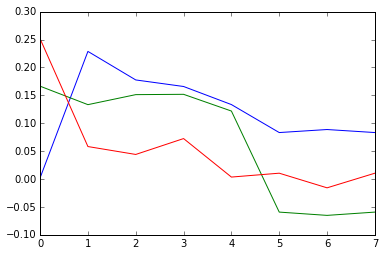

In [4]:
hor = horizonB.T
plt.plot(np.mean(horizonB,0))
plt.plot(np.mean(horizonC,0))
plt.plot(np.mean(horizonD,0))

In [5]:
allX = np.vstack([horizonB, horizonC, horizonD])
ally = np.hstack([labelsB, labelsC, labelsD])

In [6]:
allX.shape


(612977, 8)

In [7]:
Xtrain, Xtest, ytrain, ytest = train_test_split(allX, ally, test_size=0.33, random_state=42)

In [ ]:
clf = KNN(50)
clf.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=50, p=2, weights='uniform')

In [ ]:
yhat = clf.predict(Xtest)

In [ ]:
print np.sum(yhat==ytest) / float(yhat.size)
plt.plot(np.mean(horizonB,0))
plt.plot(np.mean(horizonC,0))
plt.plot(np.mean(horizonD,0))
plt.ylim([-.5,.5])
plt.show()

In [ ]:
for i,j in zip(yhat[::100], ytest[::100]):
    print i,j


In [11]:
for i in range(0,norm.shape[0],40):
    if (np.sum(norm[i,:]) > 0) and (norm[i,0] != 0):
        plt.plot(norm[i,:])
    
        plt.plot(curve)
        plt.ylim([-.5,.5])
        plt.show()
    